In [1]:
import warnings

import matplotlib.pyplot as plt
import torch
from torchvision.io import read_image

from functions import *

In [2]:
warnings.filterwarnings('ignore')

device: str = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available(): 
    device = 'mps'

x_img_resize: int = 224
y_img_resize: int = 224
img_resize: tuple = (x_img_resize, y_img_resize)

x_figure_size: int = 16
y_figure_size: int = 8
fig_size: tuple = (x_figure_size, y_figure_size)

parametri_grafici = {
    'figure.figsize': fig_size, # Dimensione della figura.
    'figure.autolayout': True,  # Regolazione automatica delle dimensioni della figura.
    'figure.titlesize': 20,     # Dimensione del titolo associato ad ogni figura (plt.suptitle()).
    'axes.titlesize': 20,       # Dimensione del titolo associato ad ogni grafico all'interno di una figura (plt.title()).
    'axes.labelsize': 20,       # Dimensione delle etichette sia sull'asse x sia sull'asse y.
    'xtick.labelsize': 15,      # Dimensione dei riferimenti sull'asse x.
    'ytick.labelsize': 15,      # Dimensione dei riferimenti sull'asse y.
    'legend.fontsize': 20,      # Dimensione dei caratteri della legenda.
}
plt.rcParams.update(parametri_grafici)

In [3]:
working_directory_path: str = os.getcwd()
images_path: str = working_directory_path + '/images'

dataset: list = load_dataset(images_path, added_new_images = False) # added_new_images = True solo quando vengono aggiunte nuove immagini al path.

In [4]:
model = load_model_resnet50().to(device)

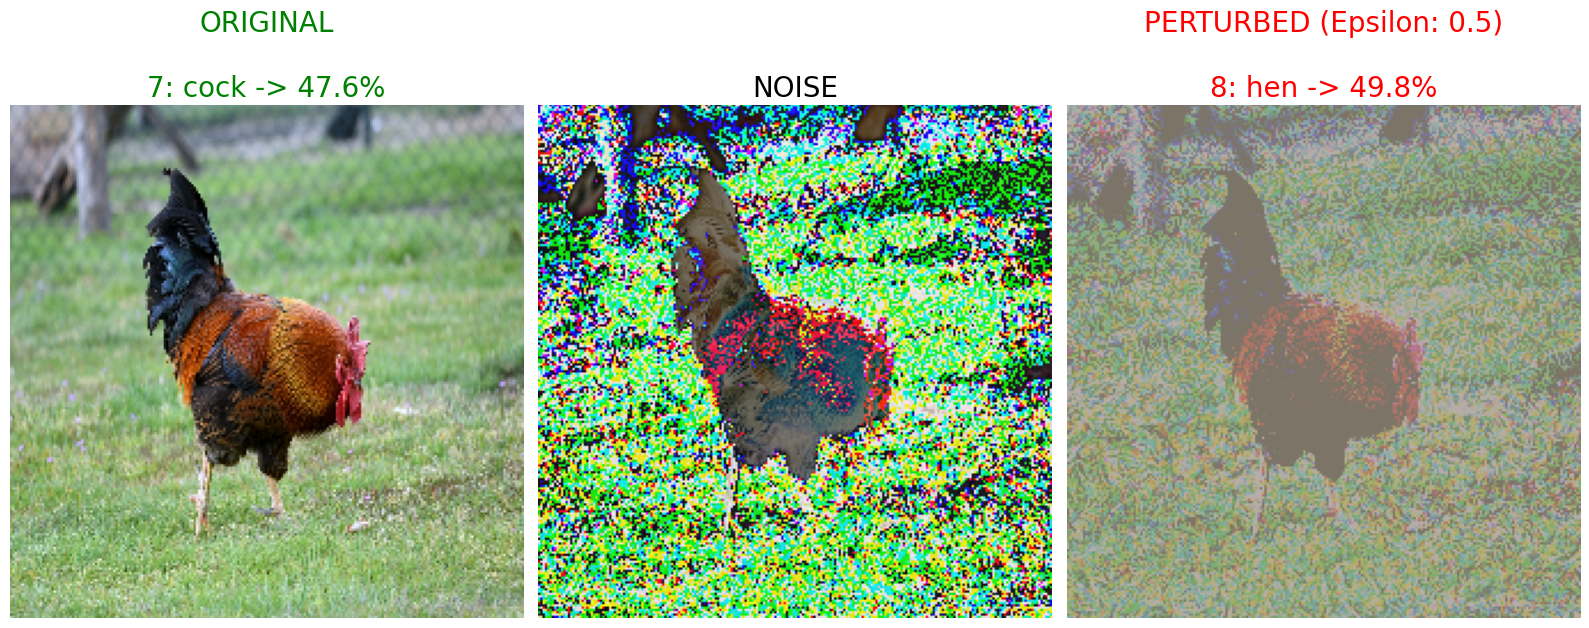

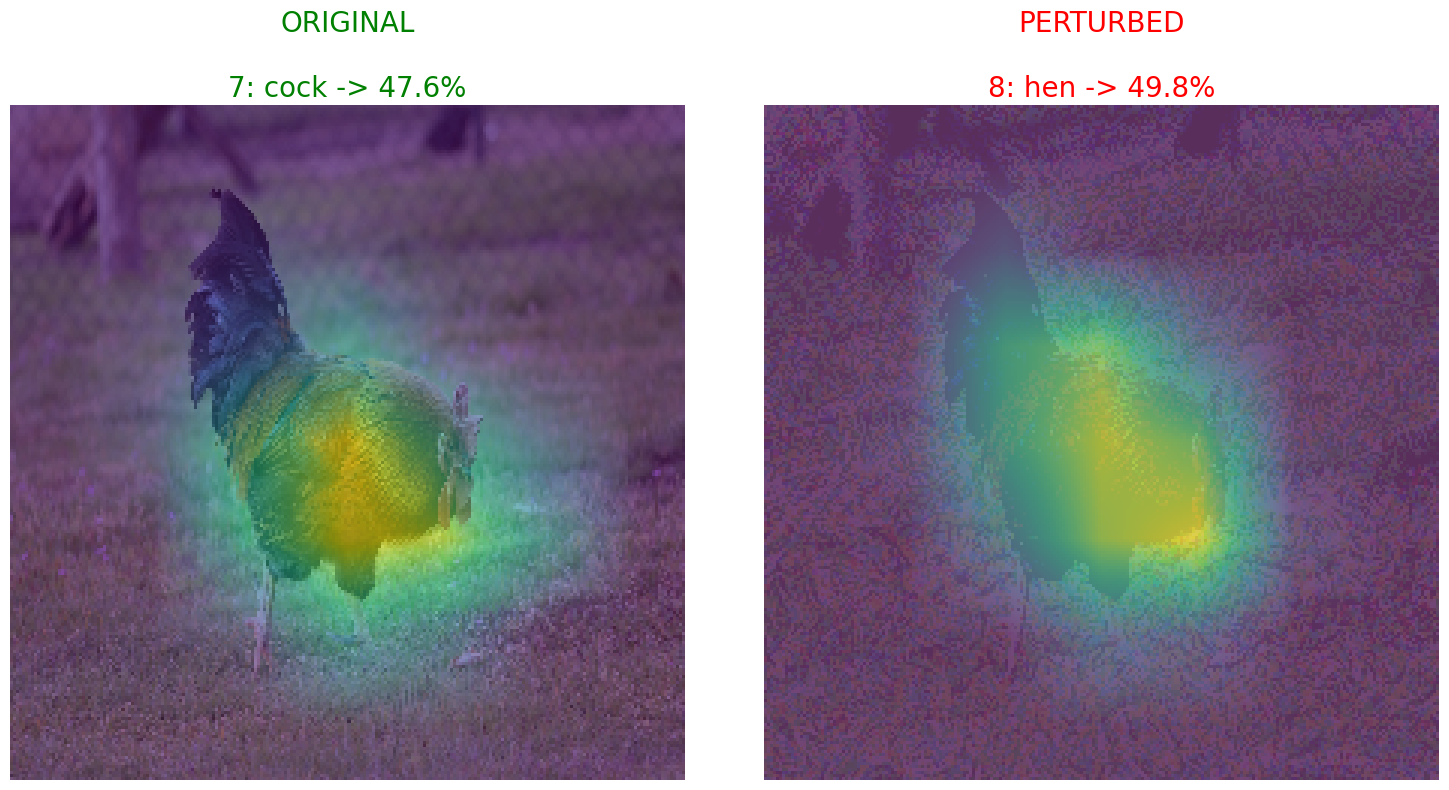

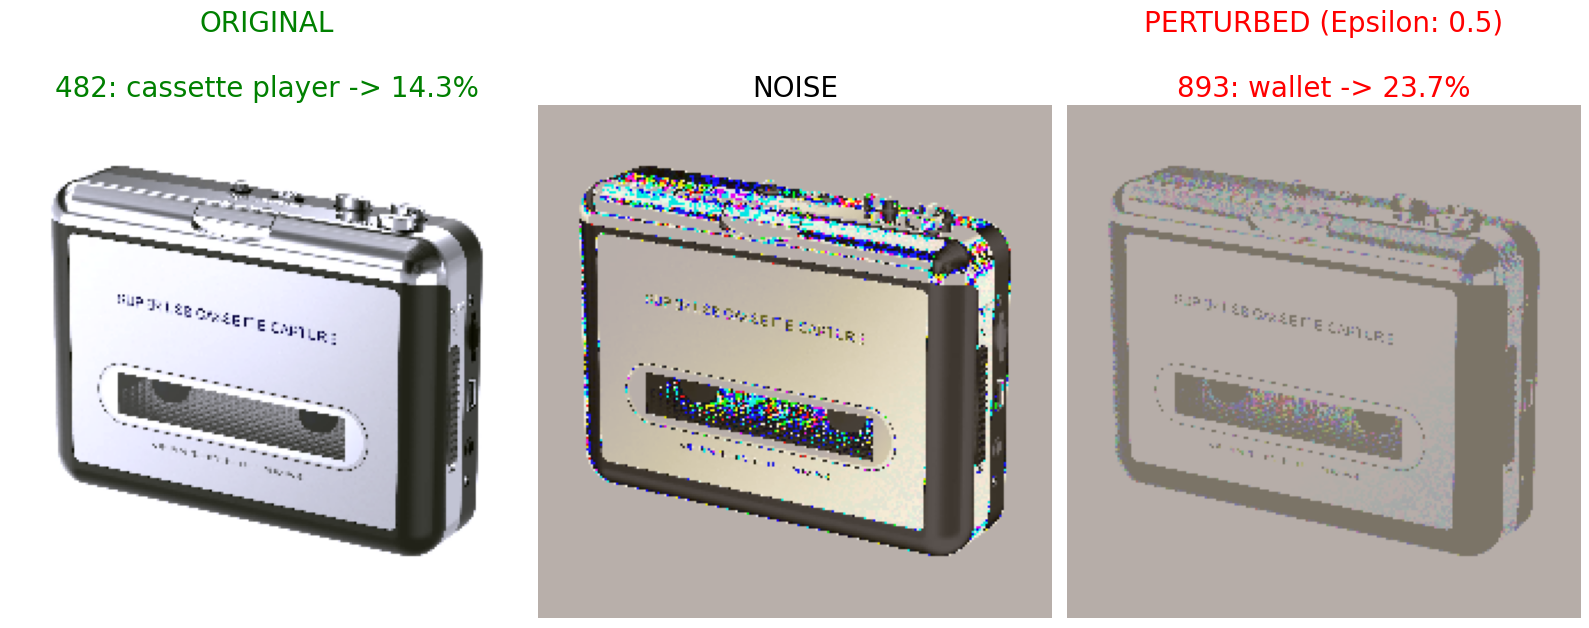

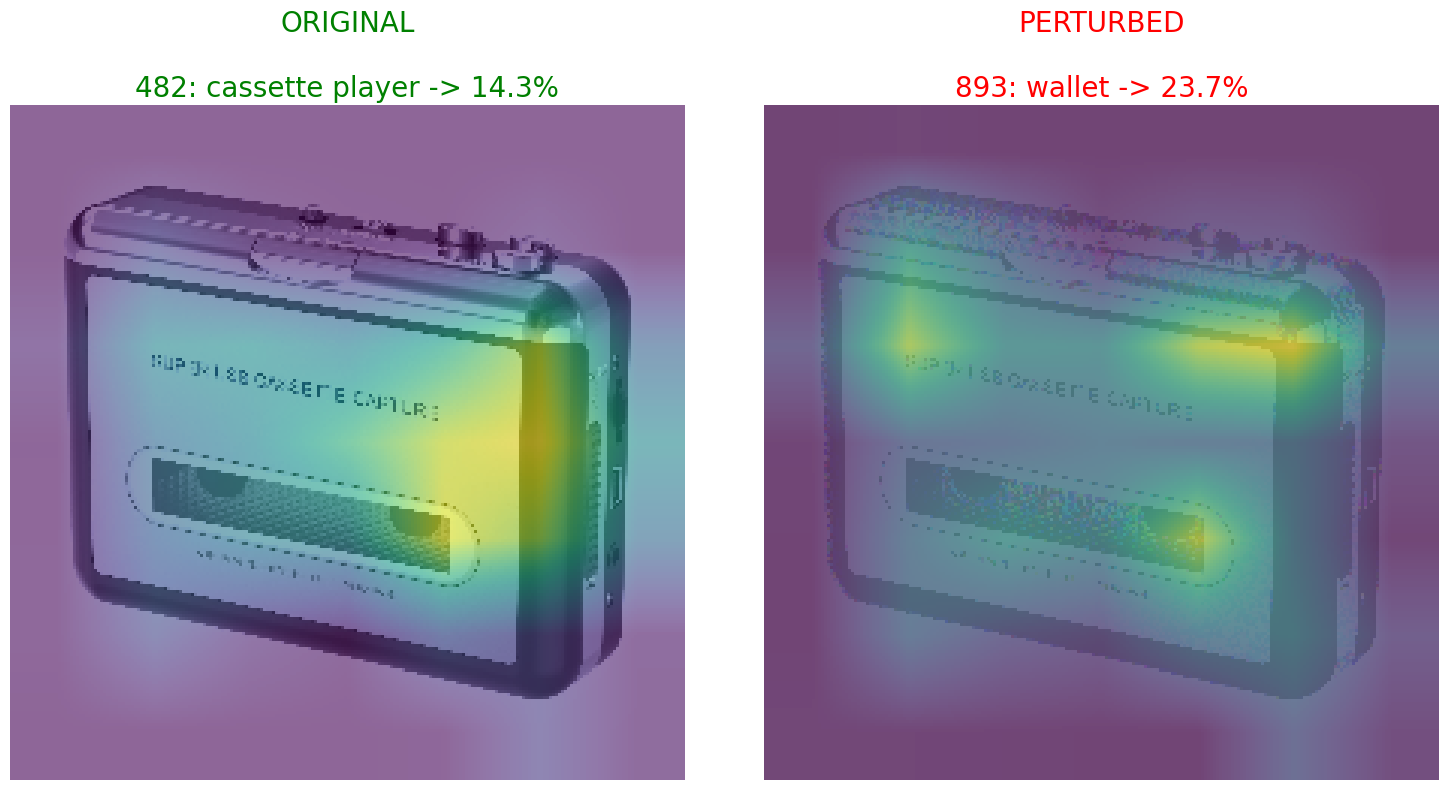

In [5]:
# I-FGSM attack.

epsilon: float = 0.5 # Parametro che controlla l’ampiezza della perturbazione che viene aggiunta all'immagine di input.
iters: int = 100 # Numero di iterazioni richiesto per cercare di massimizzare la funzione di loss.
alpha: float = epsilon/iters # Parametro che regola l'ampiezza del passo di update dell'immagine ad ogni iterazione.

triplas: list = []
for image in dataset[:2]: # A titolo di esempio considero solo le prime due immagini del dataset.
    loss_fn = nn.CrossEntropyLoss()
    original_image: torch.Tensor = read_image(image)
    original_image = preprocess(original_image, img_resize).to(device)
    perturbed_image: torch.Tensor = ifgsm_attack(model, loss_fn, original_image, epsilon, alpha, iters, device)
    original_image = postprocess(original_image)
    perturbed_image = postprocess(perturbed_image)
    noise: torch.Tensor = perturbed_image - original_image
    tripla: tuple = (original_image, noise, perturbed_image)
    triplas.append(tripla)

for tripla in triplas:
    preds_display(model, tripla, epsilon, show_noise = True)
    gradcam_display(model, tripla, img_resize)